In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
from astropy.cosmology import FlatLambdaCDM
from slsim.lens import Lens
from slsim.image_simulation import simulate_image
import os

In [6]:
# Define the parameters
z = 6
z_data = 0.2
pixel_width_data = 0.1
phi_G = 0
mag_g = 10
mag_i = 10
mag_r = 10

# Load the specific FITS file
fits_file_path = r'C:\Users\rahul\OneDrive\Documents\GitHub\Simulating_and_Predicting_Nancy_G_Roman_Telescope_Data\COSMOS_field_morphology_matching\COSMOS_23.5_training_sample\real_galaxy_images_23.5_n21.fits'
gal_hdu = 164
real_galaxy_image = fits.getdata(fits_file_path, ext=gal_hdu)

# Ensure the image is in the expected format (e.g., 2D array)
if real_galaxy_image.ndim != 2:
    raise ValueError("The FITS file does not contain a 2D image.")

# Create the interp_source table
source_interp = Table([
    [z],
    [real_galaxy_image], 
    [z_data], 
    [pixel_width_data], 
    [phi_G], 
    [mag_g],
    [mag_i],
    [mag_r]
], names=("z", "image", "z_data", "pixel_width_data", "phi_G", "mag_g", "mag_i", "mag_r"))

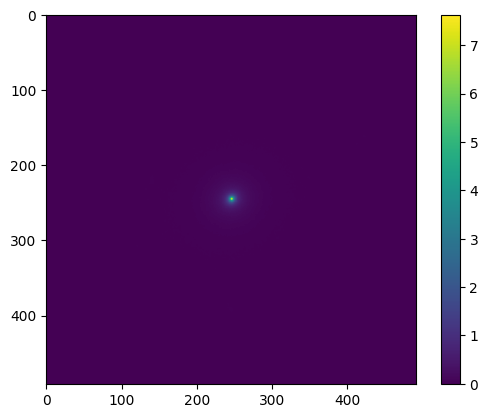

In [27]:
plt.imshow(real_galaxy_image)
plt.colorbar()


In [23]:
import os
import lenstronomy
print(lenstronomy.__version__)
# Get the absolute path of the current Jupyter Notebook file
notebook_path = os.path.abspath("COSMOS_source_image_simulation.ipynb")

red_one = Table.read(r"C:\Users\rahul\OneDrive\Documents\GitHub\slsim-COSMOS-source-class\tests\TestData\red_one_modified.fits", format="fits"
        )

print(red_one)
red_one["vel_disp"] = 400
red_one["mag_i"] = 40

print(red_one.columns)

cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
gg_lens_interp = Lens(
    source_dict=source_interp,
    deflector_dict=red_one,
    source_type="interpolated",
    cosmo=cosmo,
)

1.11.10
        z                  M          ...     e1       e2   
                                      ...                   
------------------ ------------------ ... --------- --------
0.9194649297646337 -20.01622253653665 ... -0.084347 0.097106
<TableColumns names=('z','M','coeff','ellipticity','physical_size','stellar_mass','angular_size','mag_g','mag_r','mag_i','mag_z','mag_Y','e1_light','e2_light','e1_mass','e2_mass','vel_disp','n_sersic','e1','e2')>


In [24]:
# Define the PSF kernel and transformation matrix
psf_kernel_single = np.ones((5, 5))  # Example PSF kernel, replace with actual data
transf_matrix = np.array([[0.2, 0], [0, 0.2]])  # Example transformation matrix

# Simulate the image
result_interp = simulate_image(
    lens_class=gg_lens_interp,
    band="i",
    num_pix=100,
)

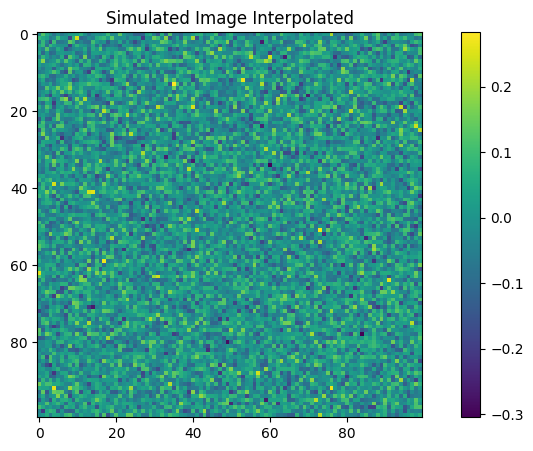

In [25]:
# Display the results
plt.figure(figsize=(10, 5))
plt.title("Simulated Image Interpolated")
plt.imshow(result_interp)
plt.colorbar()
plt.show()